In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [75]:
train = pd.read_csv('train.csv')

In [76]:
train.drop(['Name','Ticket','Cabin','PassengerId'], inplace=True, axis = 1) #remove unwanted columns 

<AxesSubplot:>

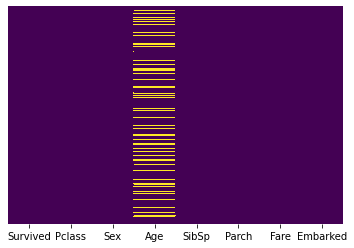

In [77]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 37
        elif (Pclass == 2):
            return 29
        else:
            return 24
    else:
        return Age

In [79]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

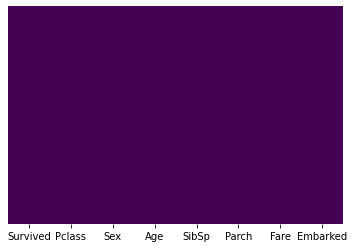

In [80]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [81]:
train.dropna(inplace=True)

In [82]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [83]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [84]:
train = pd.concat([train, sex, embarked], axis = 1)

In [85]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [86]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True) # remove unnecessary columns 

In [87]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [168]:
X = train.drop('Survived' , axis=1)
y = train['Survived']

In [169]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [170]:
print(X)

[[ 0.82520863 -0.53167023  0.43135024 ...  0.73534203 -0.30794088
   0.61679395]
 [-1.57221121  0.68023223  0.43135024 ... -1.35991138 -0.30794088
  -1.62128697]
 [ 0.82520863 -0.22869462 -0.47519908 ... -1.35991138 -0.30794088
   0.61679395]
 ...
 [ 0.82520863 -0.38018243  0.43135024 ... -1.35991138 -0.30794088
   0.61679395]
 [-1.57221121 -0.22869462 -0.47519908 ...  0.73534203 -0.30794088
  -1.62128697]
 [ 0.82520863  0.22576881 -0.47519908 ...  0.73534203  3.24737656
  -1.62128697]]


In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
logModel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0)

In [177]:
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [178]:
logModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [179]:
predictions = randomForestModel.predict(X_test)

In [180]:
from sklearn.metrics import classification_report

In [181]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       163
           1       0.96      0.47      0.63       104

    accuracy                           0.79       267
   macro avg       0.85      0.73      0.74       267
weighted avg       0.83      0.79      0.76       267



In [182]:
from sklearn.metrics import confusion_matrix

In [183]:
confusion_matrix(y_test, predictions)

array([[161,   2],
       [ 55,  49]])

In [185]:
test = pd.read_csv('test.csv')

<AxesSubplot:>

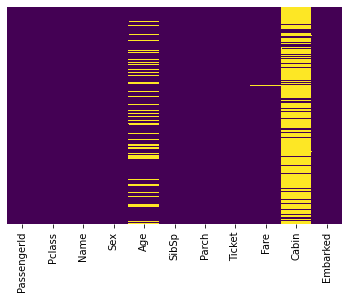

In [186]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [187]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if(Pclass == 1):
            return 37
        elif (Pclass == 2):
            return 29
        else:
            return 24
    else:
        return Age

In [188]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

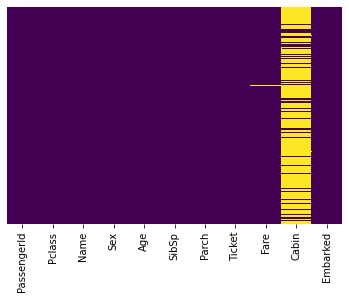

In [189]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [190]:
test.drop('Cabin', axis=1, inplace=True) #dropped the cabin column because we cant add missing values 

<AxesSubplot:>

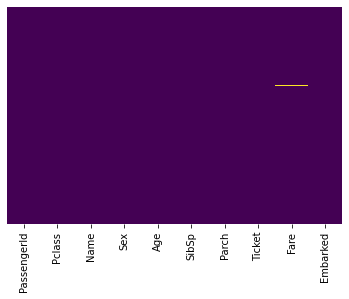

In [191]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [192]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [193]:
embarked = pd.get_dummies(test['Embarked'], drop_first=True)

In [194]:
test = pd.concat([test, sex, embarked], axis = 1)

In [195]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [196]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True) # remove unnecessary columns 

In [197]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [198]:
test['Fare'] = test['Fare'].fillna(0)

<AxesSubplot:>

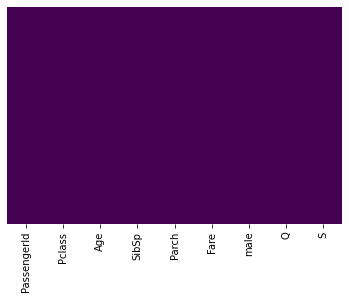

In [199]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [200]:
passanger_id = test['PassengerId']


In [201]:
X_Test = test.drop('PassengerId', axis=1)

In [202]:
X_Test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Test)
X_Test = scaler.transform(X_Test)

In [203]:
predictions = randomForestModel.predict(X_Test)

In [204]:
output = pd.concat([passanger_id, pd.DataFrame(predictions, columns=['Survived'])], axis = 1)

In [205]:
output.to_csv('results.csv', index=False)